# Geospatial Analysis Project


In [1]:
# import python libraries needed for the analyis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# import the database and its connecion

import sqlite3

con = sqlite3.connect(r'C:\Users\olayi\Downloads\Resources\zomato_rawdata.sqlite')

In [3]:
# read and load the data from the database
df = pd.read_sql_query('SELECT* FROM USERS', con)
df.head()

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
# understanding the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   index                        51717 non-null  int64 
 1   url                          51717 non-null  object
 2   address                      51717 non-null  object
 3   name                         51717 non-null  object
 4   online_order                 51717 non-null  object
 5   book_table                   51717 non-null  object
 6   rate                         43942 non-null  object
 7   votes                        51717 non-null  int64 
 8   phone                        50509 non-null  object
 9   location                     51696 non-null  object
 10  rest_type                    51490 non-null  object
 11  dish_liked                   23639 non-null  object
 12  cuisines                     51672 non-null  object
 13  approx_cost(for two people)  51

In [5]:
# From above we noticed some missing data, lets confirm

df.isnull().sum()/len(df)*100

index                           0.000000
url                             0.000000
address                         0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           15.033741
votes                           0.000000
phone                           2.335789
location                        0.040606
rest_type                       0.438927
dish_liked                     54.291626
cuisines                        0.087012
approx_cost(for two people)     0.669026
reviews_list                    0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

In [6]:
# Lets deal with the missing values, first, let's check the columns containing the missing values
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [7]:
# from the rate column, there are some inconsistencies in the values ('NEW', '-')

df['rate'].replace(('NEW', '-'), np.nan, inplace = True)
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', nan, '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [8]:
# formatting the rate column to only show the rating without the divide by 5(/5)

df['rate'] = df['rate'].apply(lambda x: float(x.split('/')[0]) if type(x) == str else x)
df['rate']

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    NaN
51714    NaN
51715    4.3
51716    3.4
Name: rate, Length: 51717, dtype: float64

In [9]:
# Analysing the relationship between online orders and rating of the restaurant
# pivot table

pivot = pd.crosstab(df['rate'], df['online_order'])
pivot

online_order,No,Yes
rate,,
1.8,5,0
2.0,11,0
2.1,9,15
2.2,10,16
2.3,29,22
2.4,36,34
2.5,38,63
2.6,83,177
2.7,141,166


<Axes: xlabel='rate'>

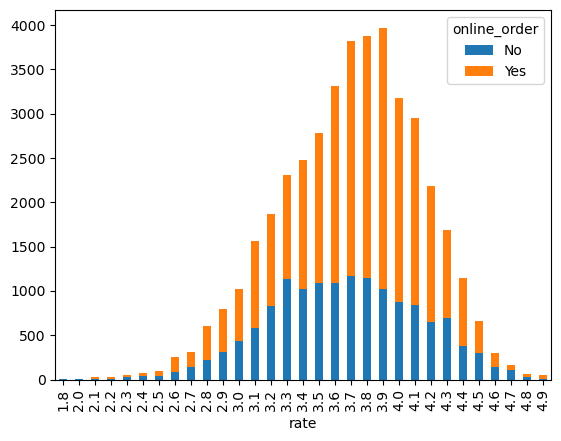

In [10]:
# visualize in a stacked bar chart

pivot.plot(kind = 'bar', stacked = True)

In [11]:
# to visualize in a 100% stacked bar chart, we normalize the data in percentage
normalize_df = (pivot.div(pivot.sum(axis = 1).astype('float'), axis = 0))*100
normalize_df

online_order,No,Yes
rate,,
1.8,100.000000,0.000000
2.0,100.000000,0.000000
2.1,37.500000,62.500000
2.2,38.461538,61.538462
2.3,56.862745,43.137255
2.4,51.428571,48.571429
2.5,37.623762,62.376238
2.6,31.923077,68.076923
2.7,45.928339,54.071661


<Axes: xlabel='rate'>

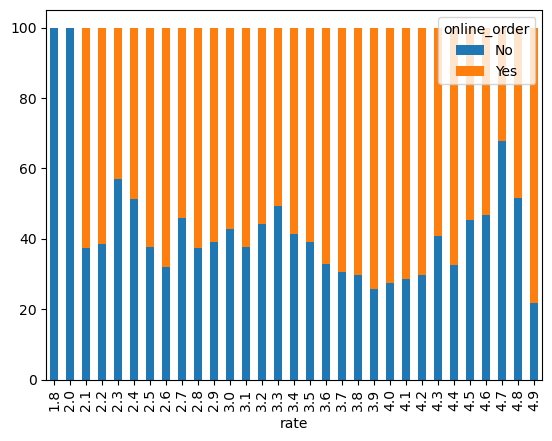

In [12]:
# Visualize a 100% stacked bar chart
normalize_df.plot(kind = 'bar', stacked = True)

In [13]:
# Text Cleaning

df['rest_type'].isnull().sum()

227

In [14]:
data = df.dropna(subset = 'rest_type')
data['rest_type'].isnull().sum()

0

In [15]:
data['rest_type'].unique

<bound method Series.unique of 0              Casual Dining
1              Casual Dining
2        Cafe, Casual Dining
3                Quick Bites
4              Casual Dining
                ...         
51712                    Bar
51713                    Bar
51714                    Bar
51715                    Bar
51716     Bar, Casual Dining
Name: rest_type, Length: 51490, dtype: object>

In [16]:
quick_bite_df = data[data['rest_type'].str.contains('Quick Bites')]

In [17]:
quick_bite_df.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [18]:
quick_bite_df['reviews_list'] = quick_bite_df['reviews_list'].apply(lambda x : x.lower())

In [19]:
from nltk.corpus import RegexpTokenizer

In [20]:
tokenizer = RegexpTokenizer('[a-zA-Z]+')

In [21]:
tokenizer

RegexpTokenizer(pattern='[a-zA-Z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)

In [22]:
review_tokens = quick_bite_df['reviews_list'].apply(tokenizer.tokenize)

In [23]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [24]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\olayi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
# Unigram Analysis 
# Performing unigram analysis and removing stopwords

from nltk.corpus import stopwords



In [26]:
stopword = stopwords.words('english')

In [27]:
review_tokens

3        [rated, rated, n, great, food, and, proper, ka...
23       [rated, rated, n, so, went, here, with, friend...
26       [rated, rated, n, please, provide, some, extra...
31       [rated, rated, n, worst, restaurant, ever, veg...
34       [rated, rated, n, not, worth, for, the, money,...
                               ...                        
51641    [rated, rated, n, food, is, not, upto, the, ma...
51642                                                   []
51643                                                   []
51644                                                   []
51645    [rated, rated, n, i, was, randomly, looking, o...
Name: reviews_list, Length: 20639, dtype: object

In [28]:
stopword.extend(['rated', 'n', 'nan', 'x', 'xa', 'f', 'c', 'Rated', 'RATED'])

In [29]:
print(stopword)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [30]:
review_token_cleaned = review_tokens.apply(lambda each_review: [token for token in each_review if token not in stopword])

In [31]:
review_token_cleaned

3        [great, food, proper, karnataka, style, full, ...
23       [went, friends, tea, ambience, striking, say, ...
26       [please, provide, extra, sambal, quantity, les...
31       [worst, restaurant, ever, veg, manchurian, wor...
34       [worth, money, pay, ambience, good, enough, se...
                               ...                        
51641    [food, upto, mark, nquantity, food, little, nc...
51642                                                   []
51643                                                   []
51644                                                   []
51645    [randomly, looking, zomato, burger, show, rest...
Name: reviews_list, Length: 20639, dtype: object

In [32]:
# Unigram analysis refers to the study or analysis of individual words in a given text or corpus

total_review_2D = list(review_token_cleaned)

In [33]:
total_review_1D = []
for review in total_review_2D:
    for word in review:
        total_review_1D.append(word)

In [34]:
from collections import Counter

Counter(total_review_1D).most_common(10)

[('food', 170672),
 ('good', 169085),
 ('place', 142338),
 ('chicken', 76826),
 ('taste', 70602),
 ('ordered', 55485),
 ('try', 43663),
 ('one', 43359),
 ('also', 42296),
 ('like', 41979)]

In [35]:
# Another method to get the counter

from nltk import FreqDist

fd = FreqDist()

In [36]:
for word in total_review_1D:
    fd[word] = fd[word] + 1

In [37]:
fd.most_common(20)

[('food', 170672),
 ('good', 169085),
 ('place', 142338),
 ('chicken', 76826),
 ('taste', 70602),
 ('ordered', 55485),
 ('try', 43663),
 ('one', 43359),
 ('also', 42296),
 ('like', 41979),
 ('service', 39651),
 ('time', 38409),
 ('order', 37012),
 ('really', 36239),
 ('biryani', 35488),
 ('best', 33589),
 ('restaurant', 32669),
 ('great', 32601),
 ('quality', 30940),
 ('nice', 30744)]

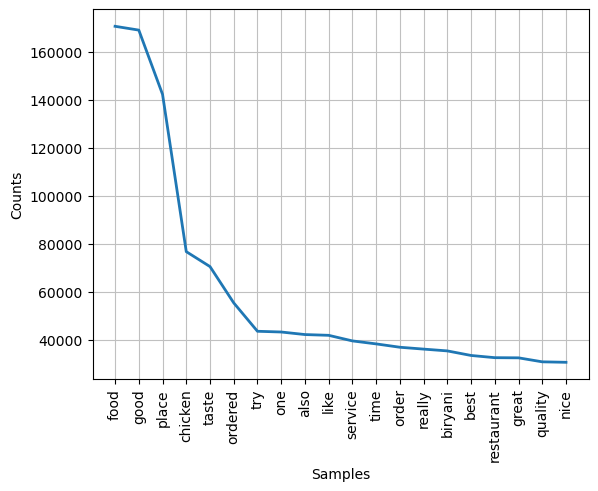

<Axes: xlabel='Samples', ylabel='Counts'>

In [38]:
fd.plot(20)

In [39]:
# Bi-gram and Tri-gram Analysis

from nltk import FreqDist, bigrams, trigrams

bigrams = bigrams(total_review_1D)

In [40]:
fd_bigrams = FreqDist()

In [41]:
for bigram in bigrams:
    fd_bigrams[bigram] = fd_bigrams[bigram] + 1

In [42]:
fd_bigrams.most_common(20)

[(('must', 'try'), 13250),
 (('good', 'food'), 11534),
 (('food', 'good'), 11139),
 (('really', 'good'), 9919),
 (('north', 'indian'), 9059),
 (('pocket', 'friendly'), 8170),
 (('taste', 'good'), 8122),
 (('good', 'place'), 8059),
 (('value', 'money'), 7139),
 (('south', 'indian'), 7032),
 (('good', 'taste'), 6593),
 (('visit', 'place'), 6296),
 (('also', 'good'), 6170),
 (('one', 'best'), 6116),
 (('fried', 'rice'), 5960),
 (('quality', 'food'), 5822),
 (('chicken', 'biryani'), 5536),
 (('non', 'veg'), 5296),
 (('ordered', 'chicken'), 5256),
 (('indian', 'food'), 4992)]

In [43]:
trigrams = trigrams(total_review_1D)

In [44]:
fd_trigram = FreqDist()

In [45]:
for trigram in trigrams:
    fd_trigram[trigram] = fd_trigram[trigram] + 1

In [46]:
fd_trigram.most_common(20)

[(('north', 'indian', 'food'), 3079),
 (('paneer', 'butter', 'masala'), 1638),
 (('must', 'visit', 'place'), 1594),
 (('south', 'indian', 'food'), 1486),
 (('good', 'food', 'good'), 1367),
 (('ordered', 'chicken', 'biryani'), 1275),
 (('pocket', 'friendly', 'place'), 1059),
 (('chicken', 'fried', 'rice'), 1050),
 (('food', 'really', 'good'), 1021),
 (('veg', 'non', 'veg'), 1013),
 (('worst', 'food', 'ever'), 939),
 (('like', 'home', 'made'), 897),
 (('must', 'try', 'place'), 896),
 (('good', 'taste', 'good'), 827),
 (('good', 'value', 'money'), 825),
 (('south', 'indian', 'breakfast'), 816),
 (('home', 'made', 'food'), 787),
 (('food', 'reasonable', 'price'), 746),
 (('good', 'quality', 'food'), 732),
 (('ghar', 'ka', 'khana'), 693)]

In [47]:
# Extracting geographical- coordinates from data

!pip install geocoder
!pip install geopy

In [48]:
df['location'].unique

<bound method Series.unique of 0                      Banashankari
1                      Banashankari
2                      Banashankari
3                      Banashankari
4                      Basavanagudi
                    ...            
51712                    Whitefield
51713                    Whitefield
51714                    Whitefield
51715    ITPL Main Road, Whitefield
51716    ITPL Main Road, Whitefield
Name: location, Length: 51717, dtype: object>

In [49]:
df['location'] = df['location'] + " , Bangalore , Karnataka , India"
df['location'].unique

<bound method Series.unique of 0             Banashankari , Bangalore , Karnataka , India
1             Banashankari , Bangalore , Karnataka , India
2             Banashankari , Bangalore , Karnataka , India
3             Banashankari , Bangalore , Karnataka , India
4             Basavanagudi , Bangalore , Karnataka , India
                               ...                        
51712           Whitefield , Bangalore , Karnataka , India
51713           Whitefield , Bangalore , Karnataka , India
51714           Whitefield , Bangalore , Karnataka , India
51715    ITPL Main Road, Whitefield , Bangalore , Karna...
51716    ITPL Main Road, Whitefield , Bangalore , Karna...
Name: location, Length: 51717, dtype: object>

In [50]:
df_copy = df.copy()

In [51]:
df_copy['location'].isnull().sum()

21

In [52]:
df_copy = df_copy.dropna(subset=['location'])

In [53]:
locations = pd.DataFrame(df_copy['location'].unique(), columns = ['names'])
locations

,names
0,"Banashankari , Bangalore , Karnataka , India"
1,"Basavanagudi , Bangalore , Karnataka , India"
2,"Mysore Road , Bangalore , Karnataka , India"
3,"Jayanagar , Bangalore , Karnataka , India"
4,"Kumaraswamy Layout , Bangalore , Karnataka , I..."
...,...
88,"West Bangalore , Bangalore , Karnataka , India"
89,"Magadi Road , Bangalore , Karnataka , India"
90,"Yelahanka , Bangalore , Karnataka , India"
91,"Sahakara Nagar , Bangalore , Karnataka , India"


In [54]:
from geopy.geocoders import Nominatim

In [55]:
geolocator = Nominatim(user_agent='app', timeout=None)

In [56]:
lat = []
lon = []

for location in locations['names']:
    location = geolocator.geocode(location)
    if location is None:
        lat.append(np.nan)
        lon.append(np.nan)
    else:
        lat.append(location.latitude)
        lon.append(location.longitude)  

In [57]:
locations['latitudes'] = lat
locations['longitudes'] = lon

In [58]:
locations

,names,latitudes,longitudes
0,"Banashankari , Bangalore , Karnataka , India",12.915219,77.573621
1,"Basavanagudi , Bangalore , Karnataka , India",12.941726,77.575502
2,"Mysore Road , Bangalore , Karnataka , India",12.946662,77.530090
3,"Jayanagar , Bangalore , Karnataka , India",12.929273,77.582423
4,"Kumaraswamy Layout , Bangalore , Karnataka , I...",12.908149,77.555318
...,...,...,...
88,"West Bangalore , Bangalore , Karnataka , India",13.022235,77.567183
89,"Magadi Road , Bangalore , Karnataka , India",12.975608,77.555356
90,"Yelahanka , Bangalore , Karnataka , India",13.100698,77.596345
91,"Sahakara Nagar , Bangalore , Karnataka , India",13.062147,77.580061


In [59]:
# Spatial Analysis

locations.isnull().sum()

names         0
latitudes     2
longitudes    2
dtype: int64

In [60]:
locations = locations.dropna()
locations.isnull().sum()

names         0
latitudes     0
longitudes    0
dtype: int64

In [61]:
df['cuisines'].isnull().sum()

45

In [62]:
df = df.dropna(subset= 'cuisines')

In [86]:
north_indian_res = df[df['cuisines'].str.contains('North Indian')]

In [64]:
north_indian_res['location'].isnull().sum()

0

In [65]:
 north_indian_location = north_indian_res['location'].value_counts().reset_index().rename(columns = {'index': 'names', 'location': 'count'})

In [66]:
 north_indian_location

,names,count
0,"BTM , Bangalore , Karnataka , India",2469
1,"HSR , Bangalore , Karnataka , India",1123
2,"Whitefield , Bangalore , Karnataka , India",1059
3,"Marathahalli , Bangalore , Karnataka , India",1038
4,"JP Nagar , Bangalore , Karnataka , India",958
...,...,...
85,"Hebbal , Bangalore , Karnataka , India",4
86,"Jakkur , Bangalore , Karnataka , India",3
87,"Central Bangalore , Bangalore , Karnataka , India",2
88,"West Bangalore , Bangalore , Karnataka , India",1


In [67]:
locations

,names,latitudes,longitudes
0,"Banashankari , Bangalore , Karnataka , India",12.915219,77.573621
1,"Basavanagudi , Bangalore , Karnataka , India",12.941726,77.575502
2,"Mysore Road , Bangalore , Karnataka , India",12.946662,77.530090
3,"Jayanagar , Bangalore , Karnataka , India",12.929273,77.582423
4,"Kumaraswamy Layout , Bangalore , Karnataka , I...",12.908149,77.555318
...,...,...,...
88,"West Bangalore , Bangalore , Karnataka , India",13.022235,77.567183
89,"Magadi Road , Bangalore , Karnataka , India",12.975608,77.555356
90,"Yelahanka , Bangalore , Karnataka , India",13.100698,77.596345
91,"Sahakara Nagar , Bangalore , Karnataka , India",13.062147,77.580061


In [68]:
 heatmap_df = north_indian_location.merge(locations, on='names', how = 'left')

In [69]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [70]:
import folium
base_map = folium.Map()

In [71]:
base_map

In [72]:
heatmap_df.columns

Index(['names', 'count', 'latitudes', 'longitudes'], dtype='object')

In [73]:
heatmap_df.isnull().sum()

names         0
count         0
latitudes     2
longitudes    2
dtype: int64

In [74]:
heatmap_df = heatmap_df.dropna()

In [75]:
heatmap_df.isnull().sum()

names         0
count         0
latitudes     0
longitudes    0
dtype: int64

In [76]:
from folium.plugins import HeatMap



In [77]:
HeatMap(heatmap_df[['latitudes', 'longitudes', 'count']]).add_to(base_map)

In [78]:
base_map

In [94]:
# Automating Data Analysis

def get_heatmap(cuisines):
    cuisines_df = df[df['cuisines'].str.contains(cuisines)]

    
    cuisines_res_location = cuisines_df['location'].value_counts().reset_index().rename(columns = {'index': 'names', 'location': 'count'})

    heatmap_df = cuisines_res_location.merge(locations, on='names', how = 'left')
    heatmap_df = heatmap_df.dropna()
    print(heatmap_df.head(4))
    
    base_map = folium.Map()
    
    HeatMap(heatmap_df[['latitudes', 'longitudes', 'count']]).add_to(base_map)
    
    return base_map

In [81]:
df['cuisines'].unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ...,
       'North Indian, Street Food, Biryani', 'Chinese, Mughlai',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)

In [95]:
# heatmap of Chinese using the automation created for get map
get_heatmap('Chinese')

                                               names  count  latitudes  \
0                BTM , Bangalore , Karnataka , India   1824  12.911276   
1                HSR , Bangalore , Karnataka , India    760  12.911623   
2  Koramangala 5th Block , Bangalore , Karnataka ...    730  12.934843   
3       Marathahalli , Bangalore , Karnataka , India    668  12.955257   

   longitudes  
0   77.604565  
1   77.638862  
2   77.618977  
3   77.698416  
